# Dataton Aiffel
* Group : EagleAI
* Dataset : 영화관 입장권 통합 전산망
* Name : 김용훈(Kim yonghun)

## Contents

1. Import libraries & load dataset
2. Data PDA
3. Data preprocessing
4. Visualization of first idea

## 1. Import libraries & load dataset

* if want to show korean on matplotlib, command annotation lines on termianl 
* set kor font in matplotlib using 'rc' function (나눔 고딕)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='AppleGothic')


* load dataset
* show dataset shape and head

In [3]:
data = pd.read_csv('KOBIS.csv')
print(data.shape)
data.head()
result = data.dtypes

(26197, 18)


## 2. Data PDA

* Check how many rows have null values.
* Visualization counts of null values in rows

Counts of rows having null values : 25179
Counts of rows having null values over 4 : 238


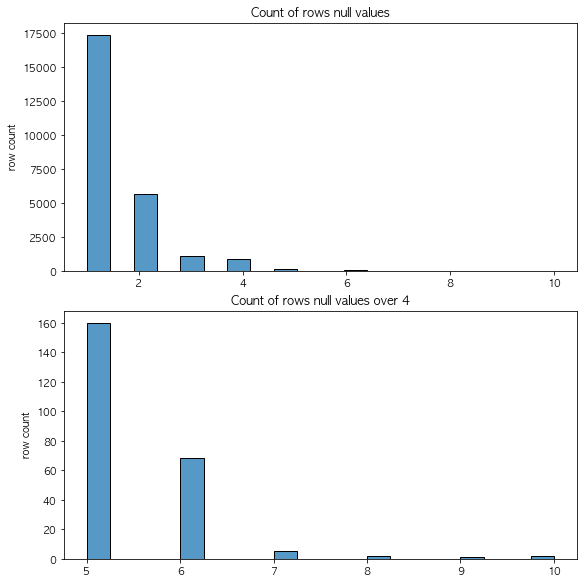

In [5]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 0 ]
print("Counts of rows having null values :", len(data_null))
data_null2 = data_null[data_null.values > 4]
print("Counts of rows having null values over 4 :", len(data_null2))

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize = (8,8))
ax[0].set_title("Count of rows null values")
sns.histplot(x=data_null.values, ax = ax[0], bins=20)
ax[0].set_ylabel('row count')
ax[1].set_title("Count of rows null values over 4")
sns.histplot(x=data_null2.values, ax = ax[1], bins=20)
ax[1].set_ylabel('row count')

plt.show()

* Delete rows having over 5 null values(78 count)

In [6]:
data_null = data_null[data_null.values > 5]
print('Count :', len(data_null))
data = data.drop(data_null.index)

Count : 78


* Check which columns have null values.

In [7]:
data_null = data.isnull().any()
data_null = data_null[data_null.values == True]
data_null_col = data_null.index
data_null_col

Index(['Director', 'Production_Company', 'Import_Company',
       'Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality',
       'National_Sales', 'Seoul_Sales', 'Genre', 'Rating'],
      dtype='object')

* Visualization how many columns have null values

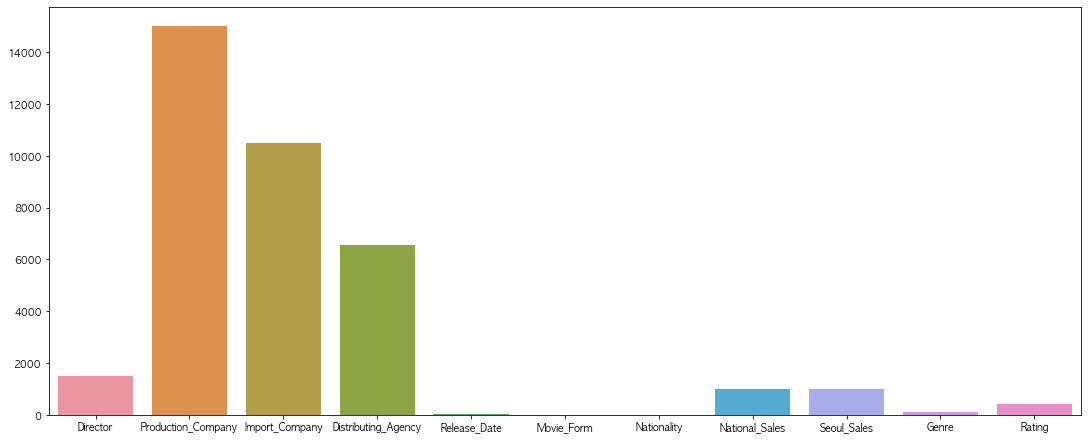

In [8]:
data_null = data.isnull().sum(axis = 0)
data_null = data_null[data_null_col]
# data_null.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(constrained_layout=True, figsize = (15,6))
sns.barplot(x=data_null.index, y=data_null.values)

plt.show()

## 3. Data preprocessing

1. Divides by whether column will contain numeric or string.
   - numeric : 'ID','National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience'
   - datetime : Release_date
   - string : other columns
2. Data preprocessing numeric columns
3. Data preprocessing string columns

Fill null value with '0' in numeric_columns have string values

In [9]:
num_columns = ['National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience']
data[num_columns] = data[num_columns].fillna('0')
data[num_columns].isna().sum()

National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
dtype: int64

Change column value type to integer

In [10]:
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('int')


In [13]:
result = data.dtypes
print(result)

ID                          int64
Movie_Name                 object
Director                   object
Production_Company         object
Import_Company             object
Distributing_Agency        object
Release_Date               object
Movie_Type                 object
Movie_Form                 object
Nationality                object
National_number_screens     int64
National_Sales              int64
National_Audience           int64
Seoul_Sales                 int64
Seoul_Audience              int64
Genre                      object
Rating                     object
Movie_Classification       object
dtype: object


In [ ]:
# String null columns
string_columns = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality', 'Genre', 'Rating']
data[string_columns].isnull().sum()

Director                1499
Production_Company     15002
Import_Company         10477
Distributing_Agency     6573
Release_Date              18
Movie_Form                 8
Nationality                4
Genre                    121
Rating                   413
dtype: int64

# graphs of every country according to 'National_Audience', 'National_number_screens', 'National_Sales','National_Audience', 'Seoul_Sales', 'Seoul_Audience' 

[Text(0.5, 0, 'Nationality'), Text(0, 0.5, 'movie quantity')]

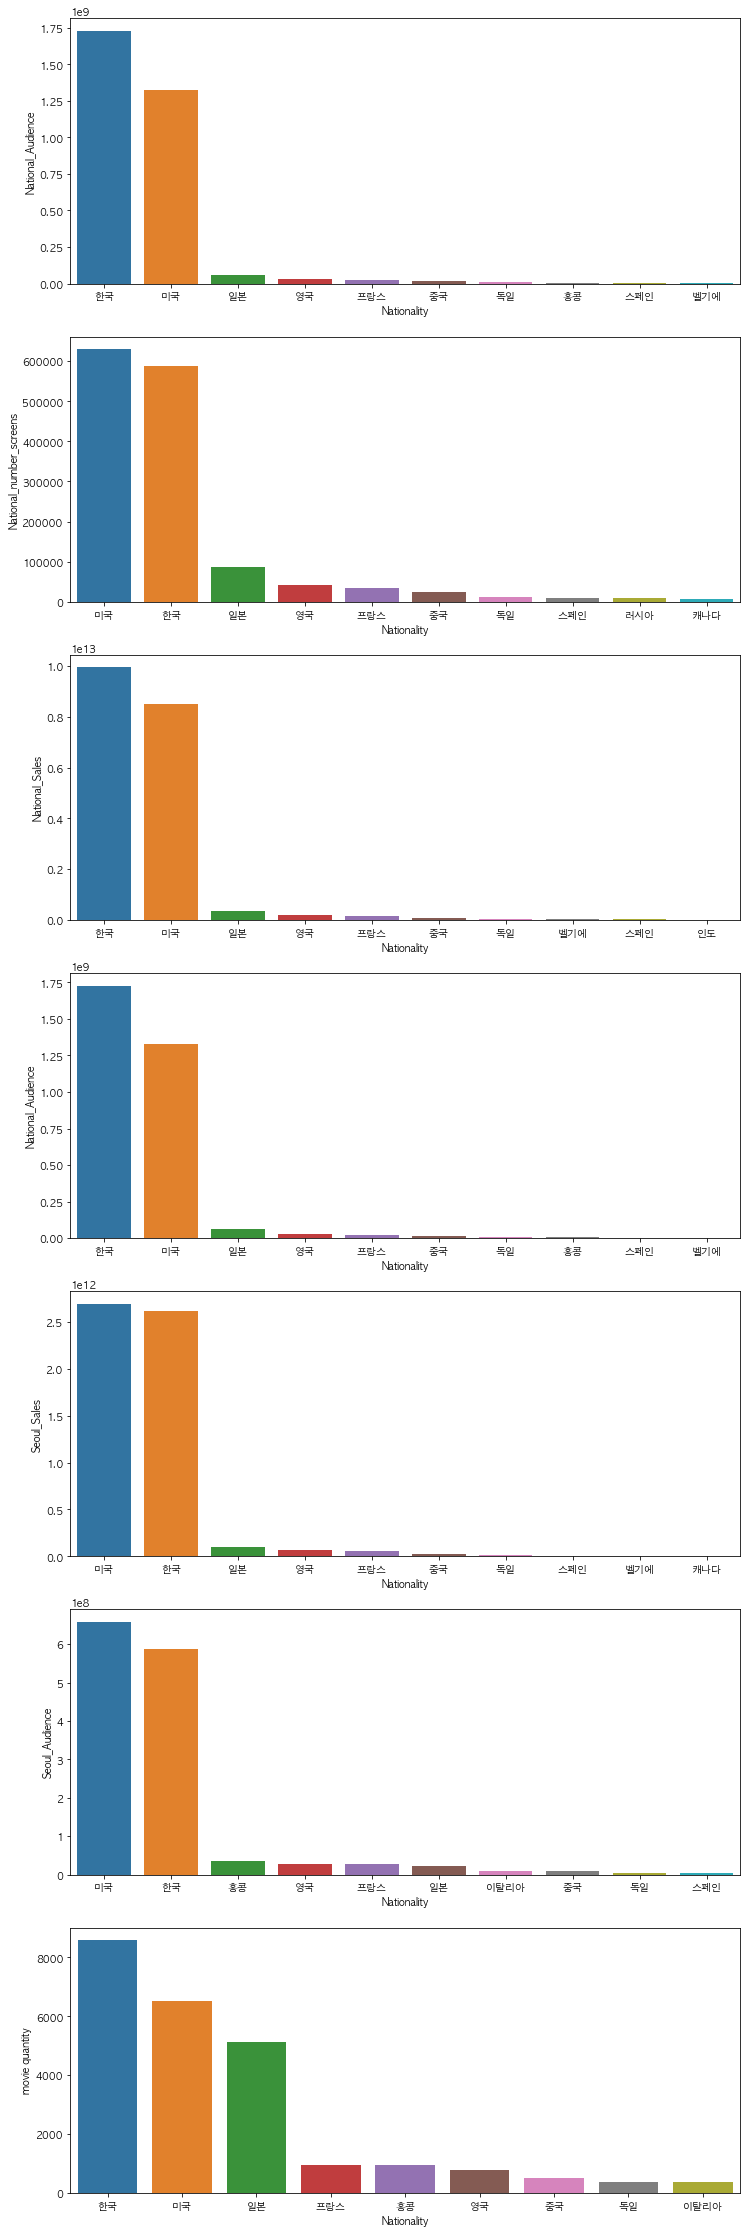

In [50]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(nrows=7)
fig.set_size_inches(12,40)
for i,df in enumerate(['National_Audience', 'National_number_screens', 'National_Sales',
       'National_Audience', 'Seoul_Sales', 'Seoul_Audience']):
        Aggregated=data.groupby('Nationality')[f'{df}'].sum()
        Sorted=pd.DataFrame(Aggregated, columns=[f'{df}']).sort_values(by=[f'{df}'],ascending=False).reset_index()
       #  print(Sorted)

        sns.barplot(data=Sorted[:10],x="Nationality",y=f'{df}',ax=ax[i])
        ax[i].set(xlabel='Nationality', ylabel=f'{df}')

sns.countplot(x='Nationality', data=data,  order = data['Nationality'].value_counts().iloc[:9].index,ax=ax[6])
ax[6].set(xlabel='Nationality', ylabel='movie quantity')



Name Genre: ['사극' 'SF' '드라마' '코미디' '액션' '전쟁' '어드벤처' '판타지' '애니메이션' '범죄' '서부극(웨스턴)'
 '멜로/로맨스' '스릴러' '미스터리' '가족' '다큐멘터리' '공포(호러)' '뮤지컬' '기타' nan '성인물(에로)' '공연']
Name Rating: ['15세이상관람가' '12세이상관람가' '12세관람가' '15세관람가' '전체관람가' '18세관람가'
 '15세 미만인 자는 관람할 수 없는 등급' '청소년관람불가' '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가'
 '15세관람가,15세이상관람가' '고등학생이상관람가,15세이상관람가' '12세 미만인 자는 관람할 수 없는 등급'
 '중학생이상관람가' '12세이상관람가,중학생이상관람가' '15세이상관람가,중학생이상관람가' '고등학생이상관람가' '연소자관람불가'
 '연소자관람가' '연소자관람가,전체관람가' '미성년자관람불가' '12세이상관람가,연소자관람가,전체관람가'
 '12세이상관람가,12세관람가' '모든 관람객이 관람할 수 있는 등급' '12세이상관람가,전체관람가'
 '18세 미만인 자는 관람할 수 없는 등급' nan '연소자관람불가,청소년관람불가' '국민학생관람불가' '미성년자관람가'
 '12세이상관람가,국민학생관람불가' '12세이상관람가,국민학생관람불가,15세이상관람가' '청소년관람불가,15세이상관람가'
 '12세이상관람가,연소자관람가' '12세이상관람가,15세 미만인 자는 관람할 수 없는 등급' '국민학생관람불가,중학생이상관람가'
 '18세관람가,청소년관람불가' '국민학생관람불가,15세이상관람가' '18세관람가,15세이상관람가' '연소자관람불가,15세이상관람가'
 '모든 관람객이 관람할 수 있는 등급,전체관람가' '청소년관람불가,전체관람가' '15세이상관람가,미성년자관람불가'
 '국민학생관람불가,청소년관람불가' '미정' '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급'
 '연소자관람가,15세이상관람가' '청소년관람불가,12세관람

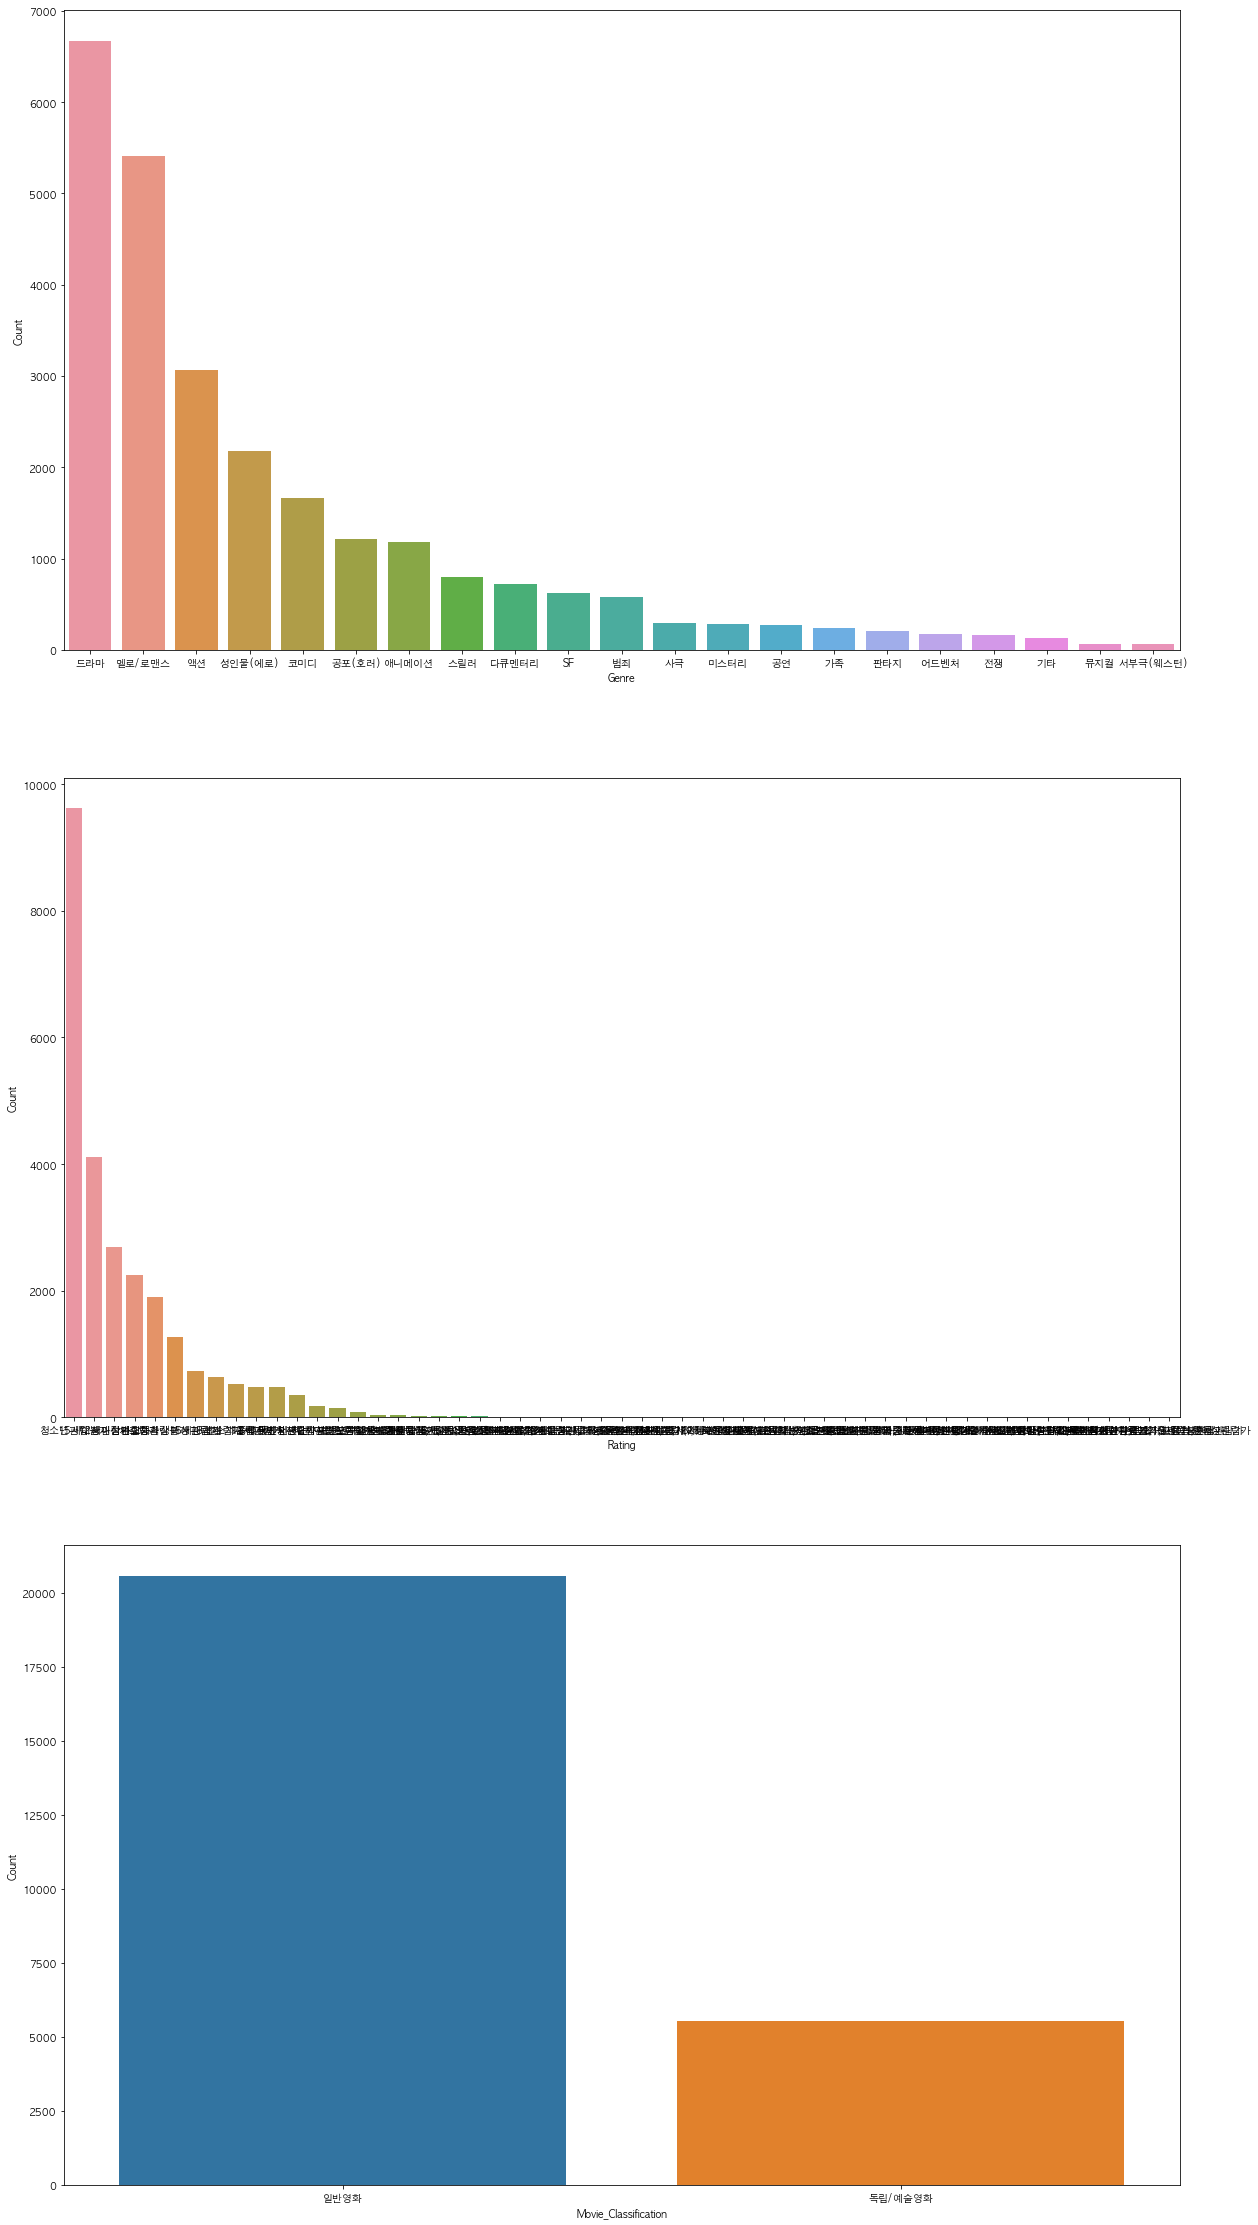

In [42]:
fig,ax= plt.subplots(nrows=3)
fig.set_size_inches(20,40)
for i,df in enumerate([  'Genre', 'Rating','Movie_Classification']):
       print(f'Name {df}:',data[f'{df}'].unique())

       sns.countplot(x=f'{df}', data=data,  order = data[f'{df}'].value_counts().index, ax=ax[i])
       ax[i].set(xlabel=f'{df}', ylabel='Count')

# Genre graphs from popular 9 countries

In [79]:
movie_countries= data['Nationality'].value_counts().iloc[:9]
countries=movie_countries.index.to_list()

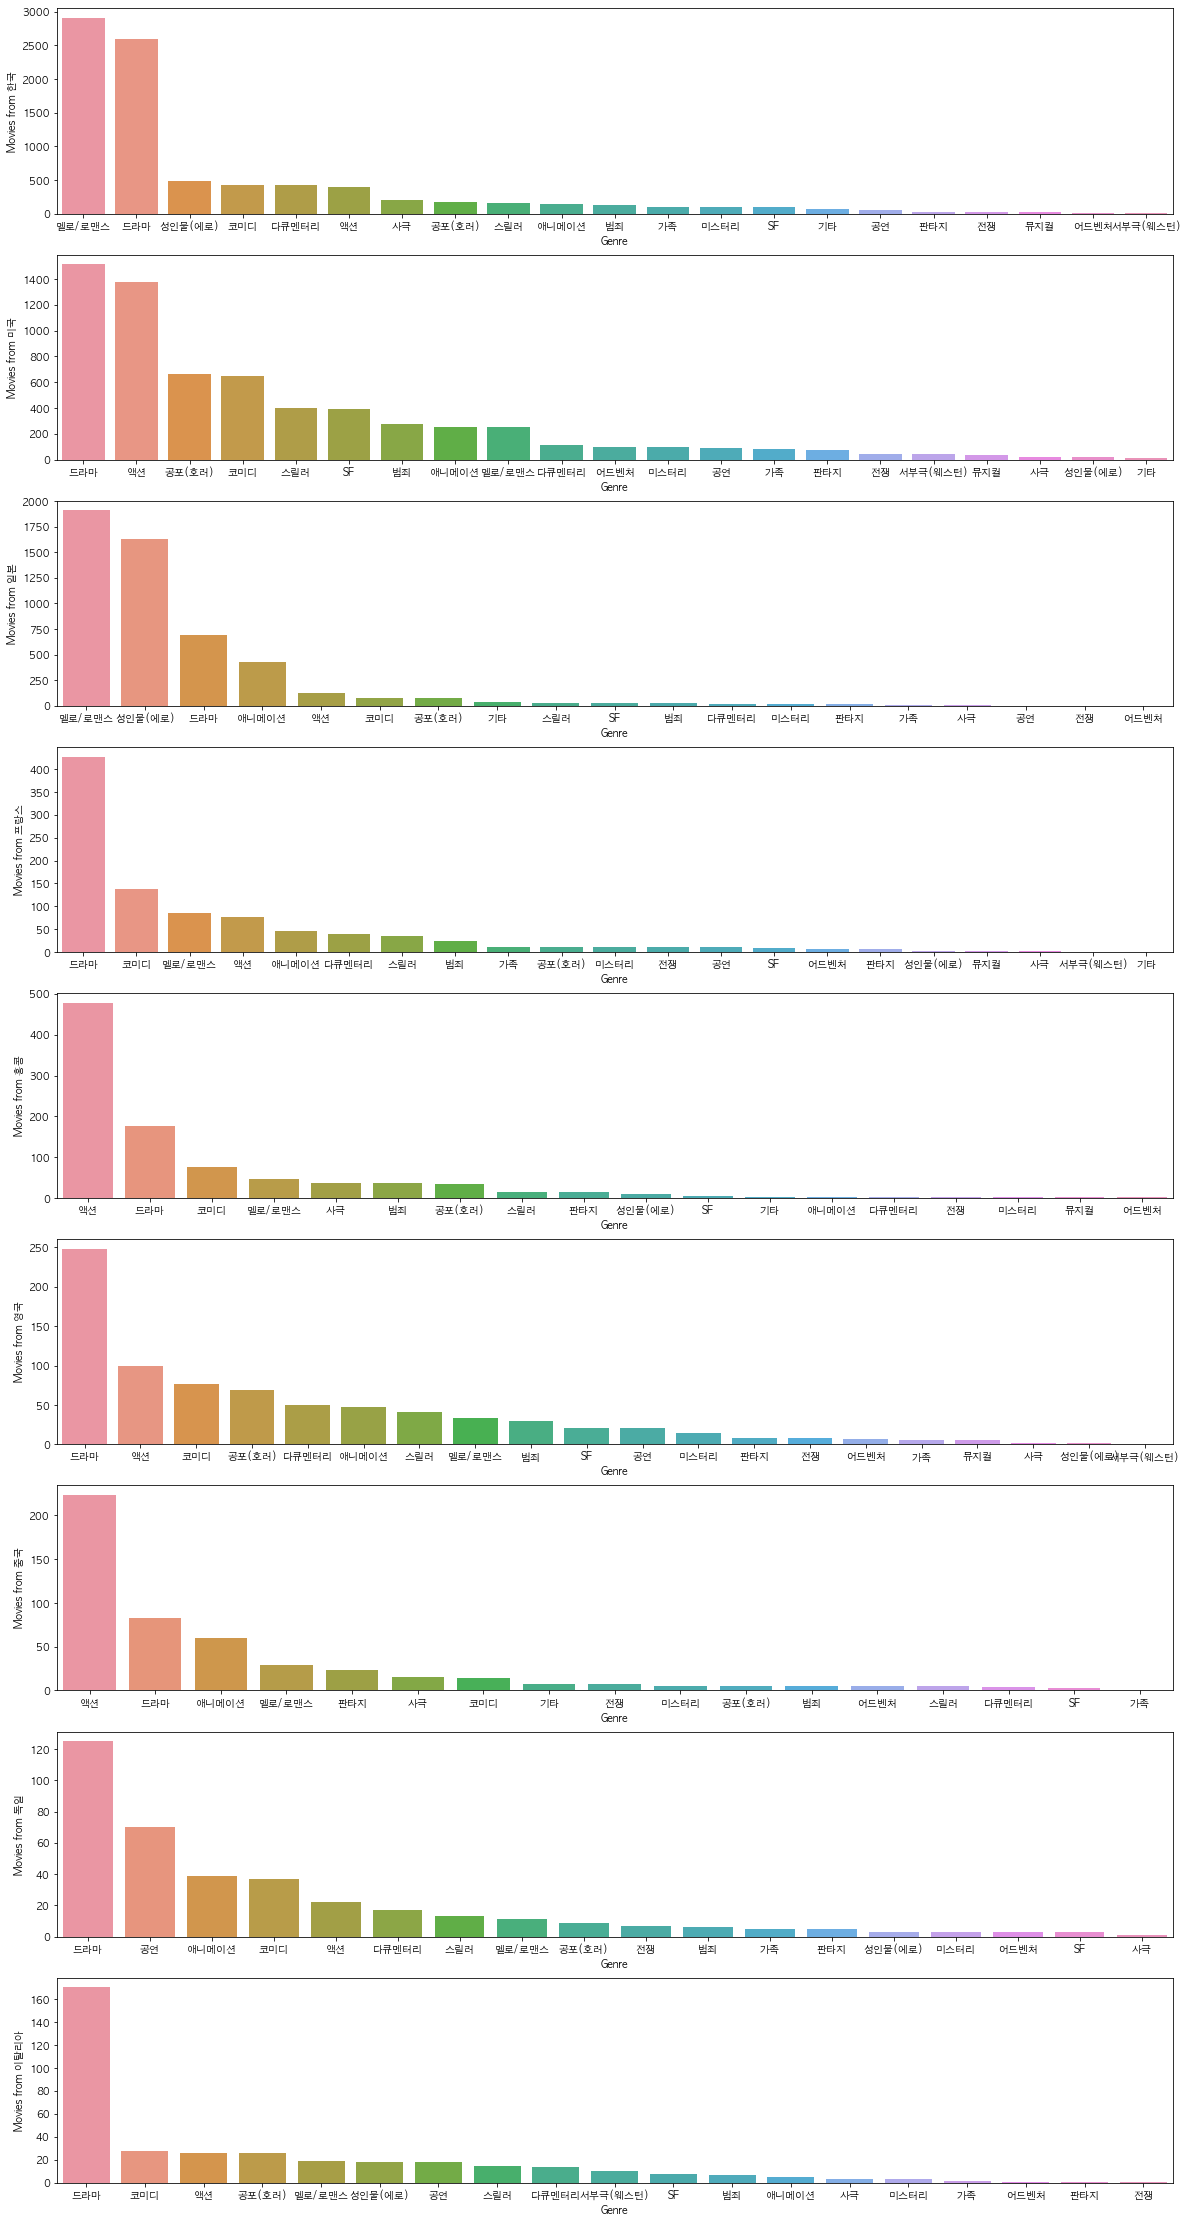

In [86]:
# ax[6].set(xlabel='Nationality', ylabel='movie quantity')
fig, ax = plt.subplots(nrows=len(countries))
fig.set_size_inches(20,40)

for i,country in enumerate(countries):
    data_country=data[data['Nationality']==country]
    sns.countplot(x='Genre', data=data_country,order = data_country['Genre'].value_counts().index,ax=ax[i])
    ax[i].set(ylabel='Movies from '+country)
